In [243]:
import streamlit as st
import pandas as pd
import numpy as np
import re
import plotly.express as px

### Data Preparation and Cleaning

In [500]:
df = pd.read_csv("aircrahesFullDataUpdated_2024.csv")

df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [143]:
df.describe()

,Year,Day,Ground,Fatalities (air),Aboard
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,1970.991063,15.785104,1.704469,22.218868,31.107249
std,24.814467,8.794474,55.105115,34.948929,45.740185
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.500000
max,2024.000000,31.000000,2750.000000,583.000000,644.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
 12  survival_rate          5035 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 511.5+ KB


In [184]:
df.duplicated().sum()

0

In [186]:
df.isna().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
survival_rate              0
dtype: int64

In [188]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'survival_rate'],
      dtype='object')

In [190]:
df[['Country/Region', 'Operator']]

,Country/Region,Operator
0,NaN,Airlines Australia GuineaTrans New
1,NaN,Airways IndiaDeccan
2,NaN,(UK) Airlines International SwitzerlandInvicta
3,unknown,Airlines Centrafricain
4,unknown,Force Air Royal
...,...,...
5030,Zaire,Force Air Zairean - Military
5031,Zaire,Commuter Air TMK
5032,Zaire,Services Aero MMM
5033,Zaire,Zaïroise Aérienne Force - Military


In [192]:
# will replace the Null values in both 'country/region' & 'operator' column with "Unknown"

df['Country/Region'].fillna("unknown", inplace = True)

In [194]:
df.isna().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region             0
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
survival_rate              0
dtype: int64

In [196]:
df['Operator'].fillna("unknown", inplace = True)

C:\Users\JOEL\AppData\Local\Temp\ipykernel_23652\1517162253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Operator'].fillna("unknown", inplace = True)


In [198]:
df.fillna({'Operator': "unknown"}, inplace = True)

In [200]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,survival_rate
0,1970,Qtr 2,April,28,unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,3
1,1952,Qtr 2,April,30,unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,0
2,1973,Qtr 2,April,10,unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,37
3,2000,Qtr 2,April,19,unknown,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,0
4,1946,Qtr 2,April,30,unknown,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,0


In [202]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
survival_rate            0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         5035 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               5035 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
 12  survival_rate          5035 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 511.5+ KB


In [206]:
df['Country/Region'].isna().sum()

0

In [208]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,survival_rate
0,1970,Qtr 2,April,28,unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,3
1,1952,Qtr 2,April,30,unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,0
2,1973,Qtr 2,April,10,unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,37
3,2000,Qtr 2,April,19,unknown,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,0
4,1946,Qtr 2,April,30,unknown,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,0


In [210]:
df.loc[:,"Country/Region"] = df.loc[:,"Country/Region"].str.replace("'-", "unknown").str.replace('The', 'unknown').str.replace("?", '').str.replace('Djibouti\tDjibouti', 'Djibouti').str.replace('Tajikistan\tMilitary', 'Tajikistan').str.replace("Prov.", "Province").str.replace("Surrey", "unknown").str.replace('10', 'unknown').str.replace('Black', 'unknown').str.replace("Norway\tCHC", "Norway").str.replace("Brazil\tAmazonaves", "Brazil").str.replace("India\tPawan", "India").str.replace('110', 'unknown').str.replace("116", "unknown").str.replace("\r\n", '').str.replace("unknown0", "unknown").str.replace("Brazil\tLoide", "Brazil").str.replace('near', 'unknown').str.replace('miles', 'unknown').str.replace("Reunion", "unknown").str.replace("Virginia.American", "Virginia").str.replace("SC", "Scotland").str.replace("DR", "Dominican Republic").str.replace("US", "United States").str.replace('Inner', 'unknown').str.replace("Chile\tAerolineas", "unknown").str.replace("Volcano", "unknown").str.replace("18", "unknown").str.replace("Newfoundlandu.s.", "unknown").str.replace('N', "unknown").str.replace("1unknown", "unknown").str.replace("570", "unknown").str.replace("800", "unknown").str.replace("325", "unknown").explode().str.strip()

In [212]:
df['Country/Region'].unique()

array(['unknown', 'Alaska', 'Afghanistan', 'Aichi', 'Algeria', 'Angola',
       'Argentina', 'Australia', 'Azerbaijan', 'Bahamas', 'Bali',
       'Belgian', 'Bolivia', 'Botswana', 'Brazil', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'Colombia', 'Colorado',
       'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East', 'Ecuador',
       'England', 'Equatorial', 'Estonia', 'Ethiopia', 'Finland',
       'Florida', 'France', 'French', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala', 'Guyana',
       'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India', 'Indiana',
       'Indonesia', 'Iowa', 'Iran', 'Iraq', 'Ireland', 'Isle', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kansas', 'Kenya', 'Laos', 'Libya',
       'London', 'Madagascar', 'Malta', 'Mexico', 'Michigan', 'Moldova',
       'Mongolia', 'Morocco', 'unknownetherlands', 'unknownevada',
       'unknownew',

In [214]:
location_mapping = {'OT': 'Ontario', 'NSW': 'New South Wales', 'New': 'Newfoundland', 'NYUS': 'New York', 'ON': 'unknown', 'Channel': 'unknown', 'SK': 'Saskatchewan', 'Sri': 'Sri Lanka', 'USSRAeroflot': 'unknown', 'Spain\tMoron': 'Spain', 'United': 'United States', 'Upper': 'unknown',
                    'BC': 'British Columbia', 'unknownevada': 'Nevada', 'unknownew': 'unknown', 'unknownewfoundland': 'Newfoundland', 'unknownicaragua': 'Nicaragua', 'unknowniger': 'Niger', 'unknownigeria':'Nigeria', 'unknownorth':'North', 'unknownorthern':'North', 'unknownorway': 'Norway', 'unknownYUnited States': 'United States', 'Ounknown': 'unknown', 'unknownebraska':'Ebraska', 'unknownepal': 'Epal', 'unknownunavut': 'Unavut', 'unknownorthwest':'Northwest', 'unknownWT':'unknown', 'WYUnited States':'United States', 'unknownE': 'unknown', 'unknownorrbotten':'Orrbotten', 'unknownorfork':'Orfork', 'unknownamibia':'Namibia', 'unknownapal': 'Apal', 'unknownuevo': 'Uevo', 'Qld.': 'Queensland', 'unknownova':'unknown', 'United StatesSRBalkan':'United States'
                    ,'unknownetherlands' :'Netherlands', 'Brazil\tLoide': 'unknown', 'PQ': 'Quebec', 'San': 'San Francisco','Airlines': 'unknown','Da': 'unknown', 'NWT': 'Northwest Territories', 'off': 'unknown', 'WA': 'Washington State','WYUS': 'unknown', 'El': 'unknown', 'HIPan': 'unknown', 'Indonesia\tSarmi': 'Indonesia', 'Los': 'Los Angeles','NSW': 'New South Wales', 'PE': 'Peru', 'Rio': ' Rio de Janeiro', 'UARMisrair': 'United Arab Republic','Warks': 'unknown', 'Air': 'unknown', 'D.C.Air': 'Congo', 'Minnesota46826/unknown9': 'Minnesota', 'NE': 'New England','Qld': 'Queensland', 'U.S.': 'United States', 'Western': 'unknown', 'HIAir': 'unknown', 'Covington/Hebron': 'Covington','Great': 'Great Britain', 'OLD': 'unknown', 'QC': 'Quebec', 'Azerbaijan\tBakou': 'Azerbaijan', 'CADuncan': 'unknown','Mt.': 'Mount', 'St.': 'Saint Petersburg', 'BrazilFlorianopolis': 'unknown', 'FL': 'Florida', 'de': 'unknown', 'Sao': 'São Paulo'}



# Clean the 'Country/Region' column
df['Country/Region'] = df['Country/Region'].apply(lambda x: location_mapping.get(x.strip(), x))

df['Country/Region'].unique()

array(['unknown', 'Alaska', 'Afghanistan', 'Aichi', 'Algeria', 'Angola',
       'Argentina', 'Australia', 'Azerbaijan', 'Bahamas', 'Bali',
       'Belgian', 'Bolivia', 'Botswana', 'Brazil', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Chechnya', 'Chile', 'China', 'Colombia', 'Colorado', 'Congo',
       'Croatia', 'Cyprus', 'Democratic', 'East', 'Ecuador', 'England',
       'Equatorial', 'Estonia', 'Ethiopia', 'Finland', 'Florida',
       'France', 'French', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Greenland', 'Guangxi', 'Guatemala', 'Guyana', 'Hawaii',
       'Honduras', 'Hong', 'Idaho', 'India', 'Indiana', 'Indonesia',
       'Iowa', 'Iran', 'Iraq', 'Ireland', 'Isle', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kansas', 'Kenya', 'Laos', 'Libya', 'London',
       'Madagascar', 'Malta', 'Mexico', 'Michigan', 'Moldova', 'Mongolia',
       'Morocco', 'Netherlands', 'Nevada', 'Newfoundland', 'Nicaragua',
       'Niger

In [216]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'survival_rate'],
      dtype='object')

In [218]:
df['Aircraft Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas', 'Pilgrim',
       'Ilyushin', 'Cessna  208B Grand', 'Hawker Siddeley', 'HS', 'Avro',
       'Lockheed 14', 'Swearingen SA227AC Metroliner', 'Yakovlev',
       'Curtiss', 'Mil', 'Convair', 'Consolidated', 'Doublas',
       'Embraer 110EJ Band./Embraer 110P', 'Learjet', 'NAMC',
       'Embraer/Piper', 'Lockheed 18', 'Cams', 'Ford', 'Grumman',
       'Lockheed', 'De Havilland', 'Mi', 'Pilatus', 'Sikorsky', '??',
       'Aérospatiale', 'Bell 212FAC',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers 610 Viking', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman', 'Dornier', 'de Havilland  Canada',
       'Aviation Traders

In [47]:


def fix_incomplete_parentheses(text):

    
    if '(' in text and ')' not in text:
        return text + ')'
    else:
        return text


# Apply the function to the 'Aircraft Manufacturer' column
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].apply(fix_incomplete_parentheses)



In [49]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64

In [51]:
df['Aircraft Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas', 'Pilgrim',
       'Ilyushin', 'Cessna  208B Grand', 'Hawker Siddeley', 'HS', 'Avro',
       'Lockheed 14', 'Swearingen SA227AC Metroliner', 'Yakovlev',
       'Curtiss', 'Mil', 'Convair', 'Consolidated', 'Doublas',
       'Embraer 110EJ Band./Embraer 110P', 'Learjet', 'NAMC',
       'Embraer/Piper', 'Lockheed 18', 'Cams', 'Ford', 'Grumman',
       'Lockheed', 'De Havilland', 'Mi', 'Pilatus', 'Sikorsky', '??',
       'Aérospatiale', 'Bell 212FAC',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers 610 Viking', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman', 'Dornier', 'de Havilland  Canada',
       'Aviation Traders

In [53]:
df.loc['Aircraft Manufacturer'] = df.loc[:,'Aircraft Manufacturer'].str.replace("?", '').str.replace("\r\n", 
    '').str.replace('Hawker Siddeley Trident 2E /', 'Hawker Siddeley Trident 2E ').str.replace('Mi', 'Mil').str.replace('C', 
    'unknown').str.replace('HS', 'unknown').str.replace('Unknown /', 'unknown').str.replace('H', 'unknown').str.replace('UH', 
    'BellHelicopter').str.replace('CH', 'unknown').str.replace('CF', 'unknown').str.replace('?42', 
    'unknown').str.replace('PA','PiperAircraft').str.replace('DC', 'Douglas Aircraft Company').str.replace('Let', 
    'Let410UVP').str.replace('L', 'unknown').str.replace('B', 'unknown').str.replace('?139', 'unknown').str.replace('?', '', 
     regex=False).str.replace('139', 'unknown').explode().str.strip()

In [55]:
df['Aircraft Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas', 'Pilgrim',
       'Ilyushin', 'Cessna  208B Grand', 'Hawker Siddeley', 'HS', 'Avro',
       'Lockheed 14', 'Swearingen SA227AC Metroliner', 'Yakovlev',
       'Curtiss', 'Mil', 'Convair', 'Consolidated', 'Doublas',
       'Embraer 110EJ Band./Embraer 110P', 'Learjet', 'NAMC',
       'Embraer/Piper', 'Lockheed 18', 'Cams', 'Ford', 'Grumman',
       'Lockheed', 'De Havilland', 'Mi', 'Pilatus', 'Sikorsky', '??',
       'Aérospatiale', 'Bell 212FAC',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers 610 Viking', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman', 'Dornier', 'de Havilland  Canada',
       'Aviation Traders

In [57]:
df.loc[:,"Aircraft Manufacturer"]=df.loc[:,"Aircraft Manufacturer"].str.replace("?", "unknown").str.replace('C', 'C47(DC)')


In [79]:
df.loc[:,"Aircraft Manufacturer"]=df.loc[:,"Aircraft Manufacturer"].str.replace('unknownunknown', 'unknown').str.replace('Swallow\r\nSwallowunknown', 'Swallow').str.replace('L', 'unknown').str.replace('H', 'unknown').str.replace('unknown/', 'unknown').str.replace('F', 'unknown')

In [66]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ..., 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE', nan], dtype=object)

In [75]:
def fix_incomplete_parentheses(text):
        if '(' in text and ')' not in text:
            return text + ')'
        else:
            return text
            
            df['Aircraft'] = df['Aircraft'].apply(fix_incomplete_parentheses)

In [70]:
df.loc[:,"Aircraft"]=df.loc[:,"Aircraft"].str.strip("?")
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ..., 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE', nan], dtype=object)

In [112]:
df['Location'] = df['Location'].str.rstrip('- ').str.strip('?')

In [114]:
df['Location']

0                           Kainatu
1                             Delhi
2                        Near Basel
3                              Pepa
4                        Pindi-Khut
                   ...             
5030               Near Kindu Zaire
5031               Near Uvira Zaire
5032    Near the Kwango River Zaire
5033                    Kindu Zaire
5034                   Ndola Zambia
Name: Location, Length: 5035, dtype: object

In [129]:
df['Operator'].unique()

array(['Airlines Australia GuineaTrans New', 'Airways IndiaDeccan',
       '(UK) Airlines International SwitzerlandInvicta', ...,
       'Services Aero MMM', 'Zaïroise Aérienne Force - Military',
       'Sweden Transair'], dtype=object)

In [120]:
df['Operator'] = df['Operator'].str.strip('?')

In [124]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
location                 0
dtype: int64

In [72]:
df.dropna(inplace = True)

### Research Questions

## Q1

In [429]:
# What is the survival rate

survival_rate = df["Aboard"] - df["Fatalities (air)"]

survival_rate

0        3
1        0
2       37
3        0
4        0
        ..
5030     0
5031     0
5032     0
5033     0
5034     0
Length: 5035, dtype: int64

In [431]:
df.loc[:, 'survival_rate'] = survival_rate

df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,survival_rate
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,3
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,0
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,37
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,0
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,0


## Q2&3

In [230]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'survival_rate'],
      dtype='object')

In [261]:
## How have aircraft crash incidents varied across years, quarters, and months?

Year = df.groupby(['Year'])['Fatalities (air)'].sum().reset_index()


top_Year = Year.sort_values(by = 'Fatalities (air)', ascending =False)


top_Year.head(5)

,Year,Fatalities (air)
61,1972,2796
74,1985,2590
62,1973,2323
85,1996,2314
63,1974,2242


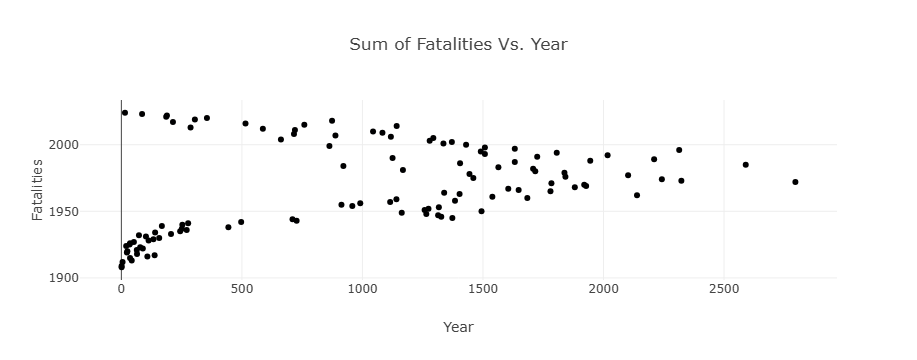

In [310]:
# Create a line chart of the Year against Fatalities 

top_Year = Year.sort_values(by = 'Fatalities (air)', ascending =False)

Year_plt = px.scatter(top_Year, x='Fatalities (air)', y='Year', title='Sum of Fatalities Vs. Year')

Year_plt.update_layout(xaxis_title='Year', yaxis_title='Fatalities')

Year_plt.show()

In [275]:
# create a combined chart for Months and Quarters against Fatalities to show the trend of death over the month

Datax = df.groupby(['Month', 'Quarter'])['Fatalities (air)'].sum().reset_index()

data_sort = Datax.sort_values(by = 'Fatalities (air)', ascending =False)

data_sort.head()

,Month,Quarter,Fatalities (air)
2,December,Qtr 4,10910
11,September,Qtr 3,10618
5,July,Qtr 3,10539
9,November,Qtr 4,10464
1,August,Qtr 3,10337


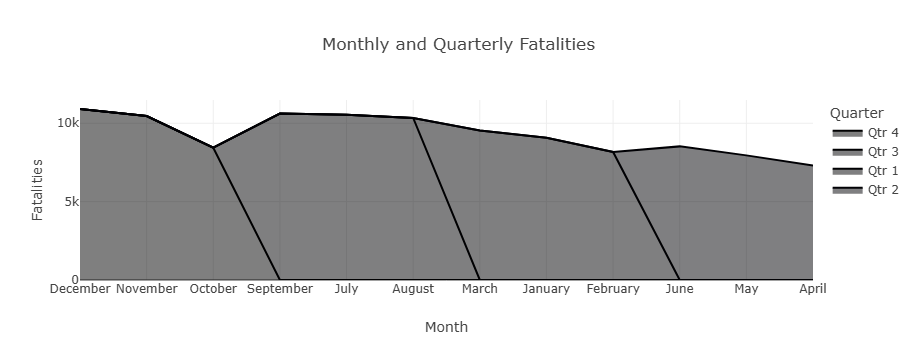

In [308]:
# Create a stacked area chart
fig = px.area(data_sort, x='Month', y='Fatalities (air)', color='Quarter', title='Monthly and Quarterly Fatalities')

fig.update_layout(xaxis_title='Month', yaxis_title='Fatalities')

fig.show()

##st.plotly_chart(fig)

## Q4

In [297]:
# Which countries have experienced the highest number of aircraft crashes?


Countries = df.groupby (['Country/Region'])['Fatalities (air)'].sum().reset_index()

countries_sort = Countries.sort_values(by = 'Fatalities (air)', ascending =False)

countries_sort

,Country/Region,Fatalities (air)
445,unknown,10232
337,Russia,8113
60,Brazil,2915
95,Colombia,2666
363,South,2452
...,...,...
393,Trento,0
162,Guantanamo,0
388,Terceira,0
76,Calilfornia,0


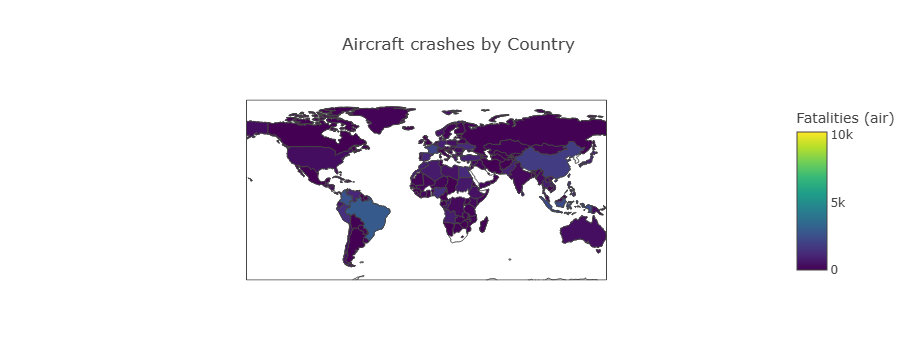

In [303]:
fig = px.choropleth(countries_sort, locations = "Country/Region", 
                   locationmode = "country names", color = "Fatalities (air)", color_continuous_scale = "Viridis",
                   title = "Aircraft crashes by Country")
fig.show()

## Q5

In [330]:
# Which aircraft manufacturers have the highest incidence of crashes?

Aircraft = df.groupby(['Aircraft Manufacturer'])['Fatalities (air)'].sum().reset_index()

Aircraft_sort = Aircraft.sort_values(by = 'Fatalities (air)', ascending =False)


Aircraft_10 = Aircraft_sort.head(10)


Aircraft_10

,Aircraft Manufacturer,Fatalities (air)
110,Boeing,20090
226,Douglas,16675
422,McDonnell Douglas,6992
38,Antonov,6527
551,Tupolev,6077
331,Ilyushin,5813
371,Lockheed,5242
32,Airbus,3927
271,Fokker,2599
204,Curtiss,1847


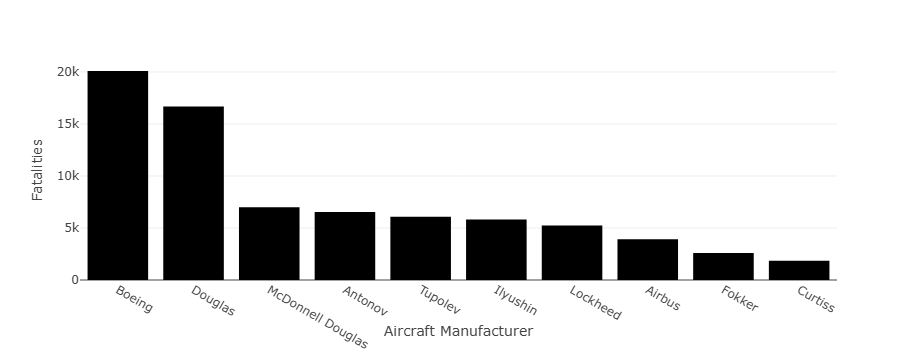

In [411]:
barchart = px.bar(Aircraft_10, x = "Aircraft Manufacturer", y = "Fatalities (air)")

barchart.update_layout(xaxis_title='Aircraft Manufacturer', yaxis_title='Fatalities')
    #st.plotly_chart(barchart)

barchart.show()

## Q6

In [433]:
# Which aircraft manufacturers have the highest survival rate?

Aircraft_survival = df.groupby(['Aircraft Manufacturer'])['survival_rate'].sum().reset_index()

Aircraft_sort = Aircraft_survival.sort_values(by = 'survival_rate', ascending =False)

Aircraft_sort_5 = Aircraft_sort.head(5)

Aircraft_sort_5

,Aircraft Manufacturer,survival_rate
110,Boeing,12473
422,McDonnell Douglas,6031
226,Douglas,4210
32,Airbus,3411
551,Tupolev,2276


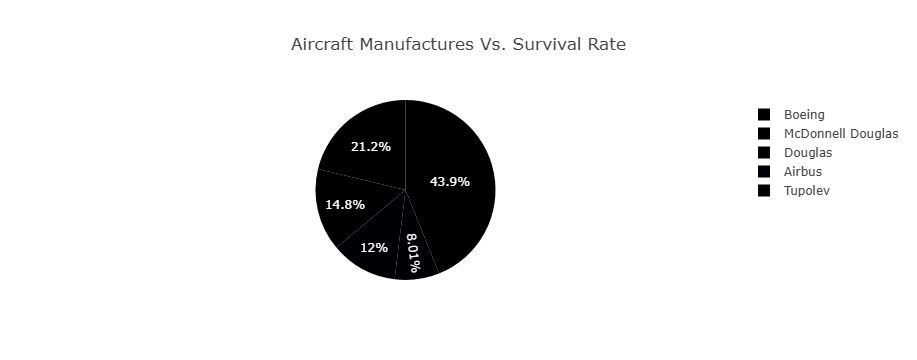

In [435]:
pie_chart = px.pie(Aircraft_sort_5, values ='survival_rate', names = 'Aircraft Manufacturer', title = 'Aircraft Manufactures Vs. Survival Rate')

#st.plotly_chart(pie_chart)

pie_chart.show()

## Q7

In [446]:
#Does the size of the aircraft (total aboard) correlate with survival rates or total fatalities?


size_aircraft = df.groupby(['Fatalities (air)','survival_rate'])['Aboard'].sum().reset_index()

size_aircraft_sort = size_aircraft.sort_values(by = 'Aboard', ascending =False)

size_aircraft_sort

,Fatalities (air),survival_rate,Aboard
562,18,0,1350
585,20,0,1280
602,21,0,1239
405,10,0,1200
636,23,0,1173
...,...,...,...
55,1,-1,0
404,10,-10,0
382,9,-9,0
304,6,-6,0


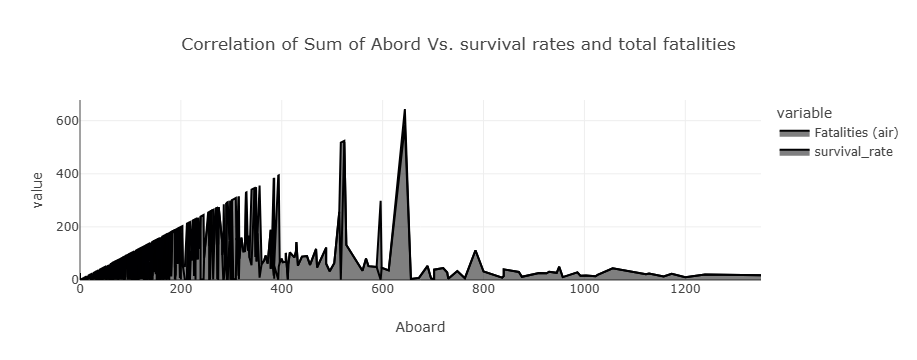

In [449]:
# Create a stacked area chart
fig = px.area(size_aircraft_sort, x='Aboard', y=['Fatalities (air)', 'survival_rate'], 
              title='Correlation of Sum of Abord Vs. survival rates and total fatalities ') 


fig.show()

#st.plotly_chart(fig)

In [ ]:
# Sample DataFrame
data = {'Survived': [1, 0, 1, 1, 0, 0, 1]} 
df = pd.DataFrame(data)

num_survivors = data['survival_rate'].sum()
total_individuals = len('survival_rate')
percentage_of_survival = (num_survivors / total_individuals) * 100

## Findings and Recomendations 

## Findings 


## 1. The trend of Fatalities Over the Years

The scatter plot visualization of fatalities over the years indicates the temporal trends in air crashes with 1972 being a peak for fatalities. Peaks in deaths may correlate with historical events, outdated technology, or specific operational factors in certain periods.

## 2. Monthly and Quarterly Trends

The area chart highlights fluctuations in fatalities across months and quarters. Some months or quarters exhibit higher crash incidences, potentially due to seasonal weather conditions, higher traffic, or operational issues.

## 3. Countries with the Most Crashes

The Choropleth map identifies countries with the highest number of fatalities from air crashes. These countries may have higher air traffic, less stringent regulations, or challenging terrain and weather conditions.

## 4. Aircraft Manufacturers with the Most Fatalities

As shown in the bar chart certain aircraft manufacturers are associated with higher fatality counts. These trends might be related to design issues, operational prevalence, or historical safety challenges.

## 5. Aircraft Manufacturers with the Highest Survival Rates

The pie chart reveals manufacturers with the highest survival rates, indicating better safety features or structural integrity in certain aircraft designs.

## 6. Aircraft Size and Survival/Fatalities Correlation
The correlation analysis between aircraft size (measured by total passengers aboard) and survival/fatality rates shows potential relationships. Larger aircraft may have higher total fatalities but also potentially higher survival rates due to advanced safety systems.

## 7. KPI Insights

Fatalities, Ground Fatalities, and Survival Percentage:
The aggregate metrics provide an overview of total fatalities and survival rates, highlighting areas for safety improvement.

## Recommendations

1. Countries with the highest fatalities should review and enhance aviation safety regulations, focusing on pilot training, maintenance standards, and air traffic control systems.
Identify seasonal or quarterly trends in crashes and adapt operational safety measures accordingly.

2. Aircraft manufacturers with high fatality counts should investigate historical design flaws and enhance maintenance programs.

3. Further research into the monthly and quarterly crash patterns can help predict and mitigate risks during high-incidence periods.

4. Implement time series analysis techniques to identify trends and patterns in crash occurrences over time. This could involve exploring factors like changes in safety regulations or technological advancements.

5. As larger aircraft exhibit potential correlations between size and survival/fatality rates, focus on improving evacuation protocols, fire suppression systems, and structural integrity.